# MNIST: мотивация использовать нейросети

In [3]:
import tensorflow as tf  # пока что используем этот пакет только для скачки данных :)
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [4]:
# скачиваем данные
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# что за данные
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


Пример кусочка картинки (пиксели со значениями от 0 до 255):


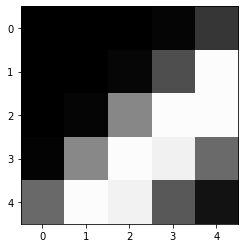

Пример картинки:


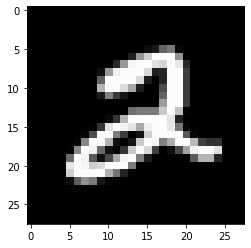

y_train [shape (60000,)] 10 примеров:
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
# нарисуем картинку
x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()
print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print("y_train [shape %s] 10 примеров:\n" % (str(y_train.shape)), y_train[:10])

# Линейная модель

Линейная модель не умеет работать с двумерным входом, поэтому предлагается превратить картинку 28x28 в вектор длины 28*28=784, выписав ее построчно!

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="400">


In [7]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val_flat.shape)

(60000, 784)
(10000, 784)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)

In [9]:
# кусочек фичей
x_train_flat[0, ::20]

array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [10]:
%%time
# обучаем линейную модель, обучается градиентными методами оптимизации
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class="multinomial", solver="lbfgs")
clf.fit(x_train_flat, y_train)

CPU times: user 42.8 s, sys: 0 ns, total: 42.8 s
Wall time: 8.03 s


/home/pavel/APPS/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [11]:
# не так плохо работает!
from sklearn.metrics import accuracy_score
accuracy_score(y_val, clf.predict(x_val_flat))

0.9246

# Градиентный бустинг

<img src="https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting_W640.jpg" width="300">

Над деревьями делают бустинг и это алгоритм №1 на Kaggle! Проверим в нашей задаче!

In [12]:
%%time
# очень долго работает (потому что алгоритм переборный)!
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(learning_rate=0.3, n_estimators=10, verbose=1, subsample=0.5)
clf.fit(x_train_flat, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3321           0.9463            1.72m
         2           1.0243           0.3055            1.52m
         3           0.8503           0.1716            1.33m
         4           0.7249           0.1240            1.14m
         5           0.6385           0.0880           57.09s
         6           0.5671           0.0692           45.69s
         7           0.5097           0.0493           34.27s
         8           0.4662           0.0387           22.83s
         9           0.4352           0.0324           11.42s
        10           0.4062           0.0266            0.00s
CPU times: user 1min 55s, sys: 39.4 ms, total: 1min 55s
Wall time: 1min 54s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=10, subsample=0.5,
                           verbose=1)

In [13]:
# качество так себе, а если картинка будет 300x300 это будет еще и вечность работать!
accuracy_score(y_val, clf.predict(x_val_flat))

0.8942

# Нейросети

Соберем сложную функцию как комбинацию простых линейных моделей (например, логистических регрессий):

<img src="https://cdn-images-1.medium.com/max/1600/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png" width="300">

Для оптимизации всех параметров нам не нужен перебор, мы можем честно посчитать производную потерь по каждому параметру и чуточку их подвинуть! Это работает очень быстро!


In [28]:
%%time
from sklearn.neural_network import MLPClassifier  # многослойный персептрон (просто много полносвязных слоев)
clf = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=1000, random_state=0, learning_rate='invscaling')
clf.fit(x_train_flat, y_train)

CPU times: user 22min 10s, sys: 21.2 s, total: 22min 31s
Wall time: 4min 1s


MLPClassifier(hidden_layer_sizes=(1000,), learning_rate='invscaling',
              max_iter=1000, random_state=0)

In [29]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100 learning_rate=invscaling hidden_layer_sizes=(1000,)
accuracy_score(y_val, clf.predict(x_val_flat))

0.9755

In [27]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100 learning_rate=invscaling
accuracy_score(y_val, clf.predict(x_val_flat))

0.9751

In [23]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100 learning_rate=adaptive
accuracy_score(y_val, clf.predict(x_val_flat))

0.9751

In [21]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100 solver=sgd
accuracy_score(y_val, clf.predict(x_val_flat))

0.97

In [19]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100 solver=lbfgs
accuracy_score(y_val, clf.predict(x_val_flat))

0.9747

In [17]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=100
accuracy_score(y_val, clf.predict(x_val_flat))

0.9751

In [15]:
# качество выше линейной модели, скорость на высоте!
# будем копать в сторону нейросетей!
# max_iter=10
accuracy_score(y_val, clf.predict(x_val_flat))

0.9742